In [1]:
# import the required packages for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset

# Get dataset
df_start = pd.read_csv('/content/sample_data/MLV/MLV.csv')
df_start.head()

,Worker code,Temperature,RH(%),Pressure P0 in (hpa),Altitude (z),Atmospheric Pressure (hPa),Heat Index (HI),Discomfort index (DI),Output
0,L1,27.060261,93.98%,1013,517.568047,951.502181,52.396475,26.644171,1
1,L1,26.769069,92.65%,1013,175.585402,991.362140,51.933931,26.273274,1
2,L1,24.623595,75.29%,1013,376.664600,967.727358,48.521348,23.247899,1
3,L1,26.744114,81.88%,1013,604.709798,941.604155,51.889727,25.524064,1
4,L1,29.705217,71.49%,1013,488.107074,954.871996,56.612926,27.320727,1


In [3]:
# Data Analysis
df_start.describe()

,Temperature,Pressure P0 in (hpa),Altitude (z),Atmospheric Pressure (hPa),Heat Index (HI),Discomfort index (DI),Output
count,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000
mean,27.043937,1013.0,399.248650,965.249945,52.378442,25.657927,1.013333
std,2.868441,0.0,143.023507,16.563576,4.560510,2.729741,0.270925
min,20.308026,1013.0,156.392231,936.911934,41.702734,19.360583,0.000000
25%,24.906763,1013.0,275.428759,950.231075,48.970130,23.712038,1.000000
50%,27.139217,1013.0,394.176336,965.695907,52.519061,25.835293,1.000000
75%,29.353426,1013.0,528.708014,979.555301,56.046974,27.730084,1.000000
max,32.351540,1013.0,646.340443,993.648057,60.853320,31.731935,2.000000


Here, we can see DI index values ranges from 19.36 to 31.73 and a median of 25.65.

Here, the output is
0-Comfort zone
1-Partially comfort
2-Uncomfort (Panic button pressed)

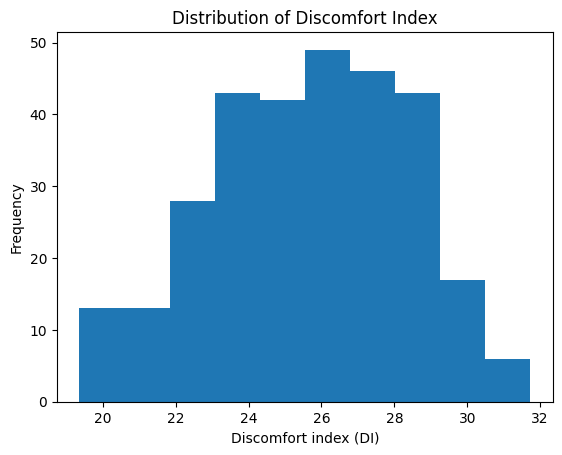

In [9]:
# prompt: plot distribution curve for Discomfort index (DI)

# Plot distribution curve for Discomfort index (DI)
plt.hist(df_start['Discomfort index (DI)'], bins=10)
plt.xlabel('Discomfort index (DI)')
plt.ylabel('Frequency')
plt.title('Distribution of Discomfort Index')
plt.show()


In [11]:
# prompt: Check for normality for Discomfort index (DI)

import scipy.stats as stats

# Perform the Shapiro-Wilk test
w, p_value = stats.shapiro(df_start['Discomfort index (DI)'])

# Print the results
print('Shapiro-Wilk Test Statistic:', w)
print('p-value:', p_value)

if p_value < 0.05:
    print('The data is  normally distributed.')
else:
    print('The data is not normally distributed.')


Shapiro-Wilk Test Statistic: 0.9860475659370422
p-value: 0.0052754245698452
The data is  normally distributed.


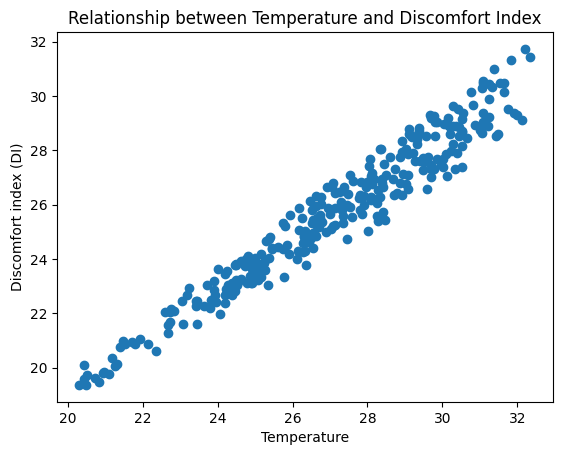

Correlation coefficient: 0.9728045681972709


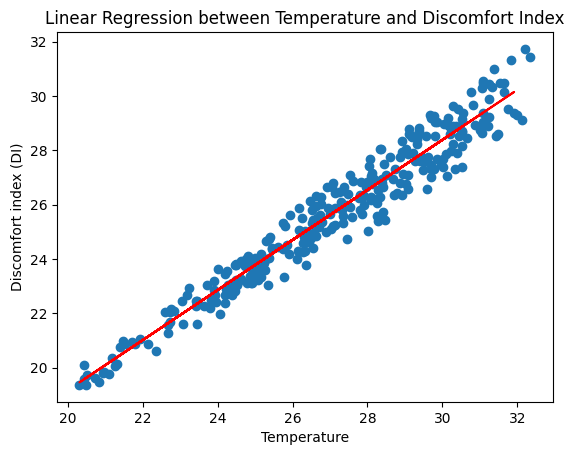

In [15]:
# prompt: Build relationship between the temperature and Discomfort index (DI) and plot in graphs

# Plot the relationship between temperature and Discomfort index (DI)
plt.scatter(df_start['Temperature'], df_start['Discomfort index (DI)'])
plt.xlabel('Temperature')
plt.ylabel('Discomfort index (DI)')
plt.title('Relationship between Temperature and Discomfort Index')
plt.show()

# Calculate the correlation coefficient
correlation = df_start['Temperature'].corr(df_start['Discomfort index (DI)'])
print('Correlation coefficient:', correlation)

# Perform a linear regression
X = df_start[['Temperature']]
y = df_start['Discomfort index (DI)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the regression line
plt.scatter(df_start['Temperature'], df_start['Discomfort index (DI)'])
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel('Temperature')
plt.ylabel('Discomfort index (DI)')
plt.title('Linear Regression between Temperature and Discomfort Index')
plt.show()


In [17]:
# prompt: Step 4: Split the dataset into dependent/independent variables
# Discomfort Index (X) is the independent variable
# temperature and relative humidity (y) is dependent on experience

# Split the dataset into dependent and independent variables
X = df_start[['Discomfort index (DI)']]
y = df_start[['Temperature', 'RH(%)']]


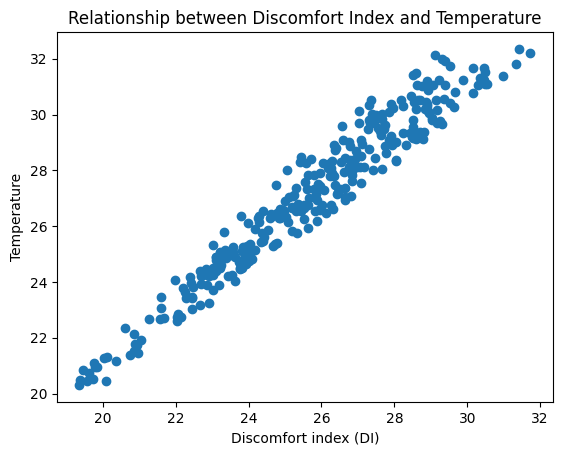

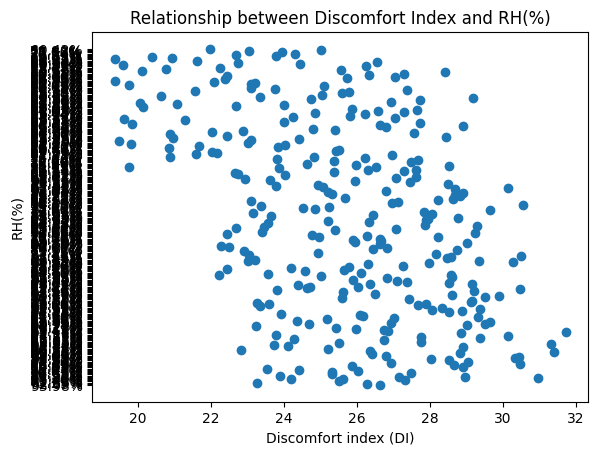

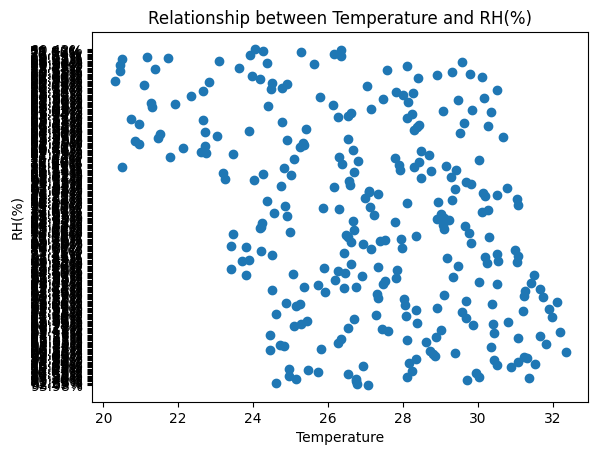

In [18]:
# prompt: plot and check the data of above through graphs

# Plot the relationship between Discomfort index (DI) and Temperature
plt.scatter(df_start['Discomfort index (DI)'], df_start['Temperature'])
plt.xlabel('Discomfort index (DI)')
plt.ylabel('Temperature')
plt.title('Relationship between Discomfort Index and Temperature')
plt.show()

# Plot the relationship between Discomfort index (DI) and RH(%)
plt.scatter(df_start['Discomfort index (DI)'], df_start['RH(%)'])
plt.xlabel('Discomfort index (DI)')
plt.ylabel('RH(%)')
plt.title('Relationship between Discomfort Index and RH(%)')
plt.show()

# Plot the relationship between Temperature and RH(%)
plt.scatter(df_start['Temperature'], df_start['RH(%)'])
plt.xlabel('Temperature')
plt.ylabel('RH(%)')
plt.title('Relationship between Temperature and RH(%)')
plt.show()


In [32]:
# prompt: Split  Temperature , RH(%) , and Discomfort Index

# Split the dataset into dependent and independent variables
X = df_start[['Temperature', 'RH(%)']]
y = df_start['Discomfort index (DI)']


In [33]:
# prompt: Further, split your data into training (80%) and test (20%) sets using train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [37]:
# prompt: Train the regression model and fix the error "could not convert string to float: '77.70%'" before run the model

# Convert the 'RH(%)' column to numeric
df_start['RH(%)'] = df_start['RH(%)'].str.rstrip('%').astype('float')

# Split the dataset into dependent and independent variables
X = df_start[['Temperature', 'RH(%)']]
y = df_start['Discomfort index (DI)']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean squared error: 0.022057856153741333
Root mean squared error: 0.14851887473900863
Coefficient of determination: 0.9969675410391204


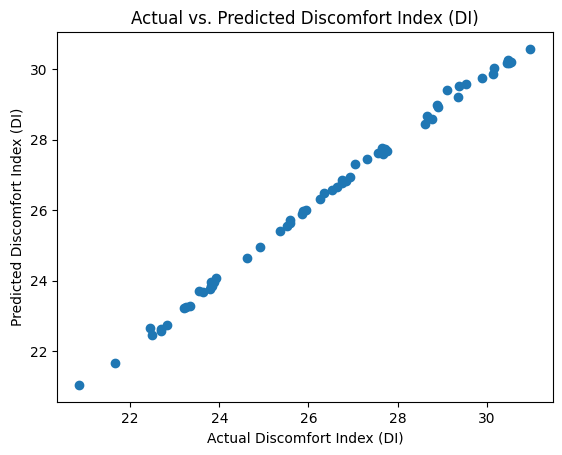

In [38]:
# prompt: Predict the results by running above training datasets and show the results

# Predict the Discomfort Index (DI) for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print('Mean squared error:', mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root mean squared error:', rmse)

# Calculate the coefficient of determination (R^2)
r2 = model.score(X_test, y_test)
print('Coefficient of determination:', r2)

# Plot the actual vs. predicted Discomfort Index (DI)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Discomfort Index (DI)')
plt.ylabel('Predicted Discomfort Index (DI)')
plt.title('Actual vs. Predicted Discomfort Index (DI)')
plt.show()
